# 🧩 Notebook 05: Real-World Exploratory Data Analysis (EDA) with Seaborn

In [1]:
# 📦 Setup & Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
UTILS_DIR = PROJECT_ROOT / "utils"
if str(UTILS_DIR) not in sys.path:
    sys.path.insert(0, str(UTILS_DIR))

# 🧰 Custom utilities
from plot_utils import (
    apply_theme,
    stylize_plot,
    add_reference_line,
    save_fig,
    annotate_points
)

# 🎨 Apply project-wide theme
apply_theme()

print("✅ Seaborn Project Utils Loaded")

✅ Seaborn Project Utils Loaded


In [2]:
# 🔹 Load Dataset: ecommerce_data.csv

df = pd.read_csv("../datasets/ecommerce_data.csv")
df.head()

,User ID,Age,Session Time (min),Page Views
0,1000,39,8.91,3
1,1001,23,13.23,9
2,1002,43,13.15,6
3,1003,30,17.90,8
4,1004,24,23.60,6


In [3]:
# 📊 Basic Overview

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User ID             100 non-null    int64  
 1   Age                 100 non-null    int64  
 2   Session Time (min)  100 non-null    float64
 3   Page Views          100 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [4]:
# Statistical description

df.describe()

,User ID,Age,Session Time (min),Page Views
count,100.000000,100.000000,100.000000,100.000000
mean,1049.500000,37.990000,11.331500,6.100000
std,29.011492,11.446401,4.639202,2.267469
min,1000.000000,18.000000,0.530000,1.000000
25%,1024.750000,28.000000,8.570000,4.750000
50%,1049.500000,38.000000,11.775000,6.000000
75%,1074.250000,47.000000,14.257500,8.000000
max,1099.000000,59.000000,24.280000,11.000000


In [5]:
# Checking for null values

df.isnull().sum()

User ID               0
Age                   0
Session Time (min)    0
Page Views            0
dtype: int64

✅ Plot saved to ../exports/05_eda/ecommerce_missing_heatmap.png


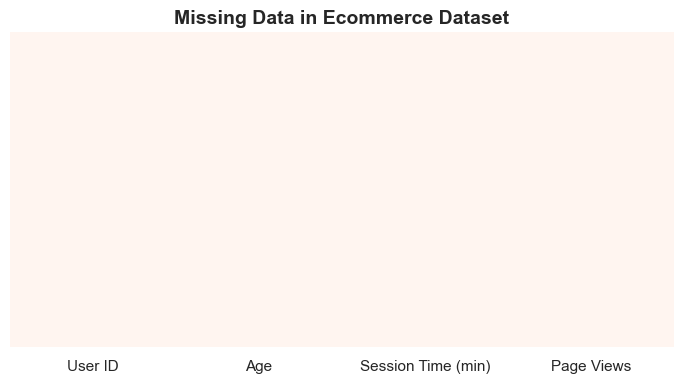

In [6]:
# 📊 Missing Values Heatmap (if any)

plt.figure(figsize=(7, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="Reds", yticklabels=False)

stylize_plot("Missing Data in Ecommerce Dataset")
save_fig("../exports/05_eda/ecommerce_missing_heatmap.png")
plt.show()

✅ Plot saved to ../exports/05_eda/ecommerce_age_distribution.png


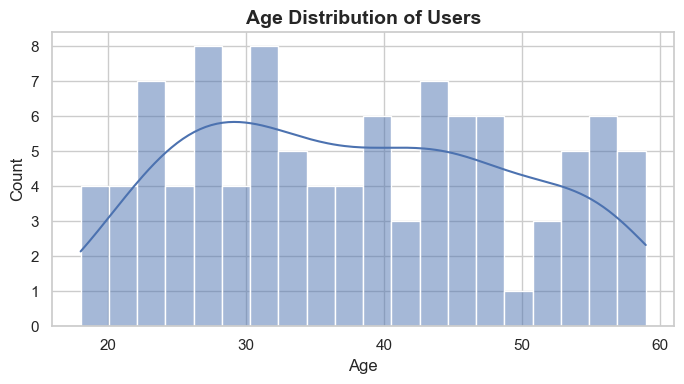

In [7]:
# 📊 Age Distribution (Histogram + KDE)

plt.figure(figsize=(7, 4))
sns.histplot(data=df, x="Age", kde=True, bins=20)

stylize_plot("Age Distribution of Users", "Age", "Count")
save_fig("../exports/05_eda/ecommerce_age_distribution.png")
plt.show()

✅ Plot saved to ../exports/05_eda/ecommerce_session_time_kde.png


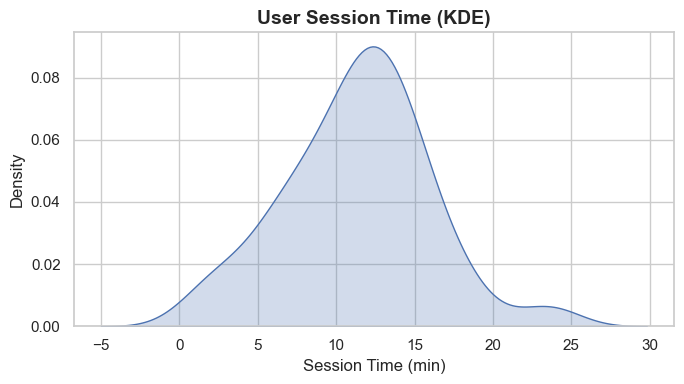

In [8]:
# 📊 Session Time Distribution

plt.figure(figsize=(7, 4))
sns.kdeplot(data=df, x="Session Time (min)", fill=True)

stylize_plot("User Session Time (KDE)", "Session Time (min)", "Density")
save_fig("../exports/05_eda/ecommerce_session_time_kde.png")
plt.show()

✅ Plot saved to ../exports/05_eda/ecommerce_pageviews_vs_age.png


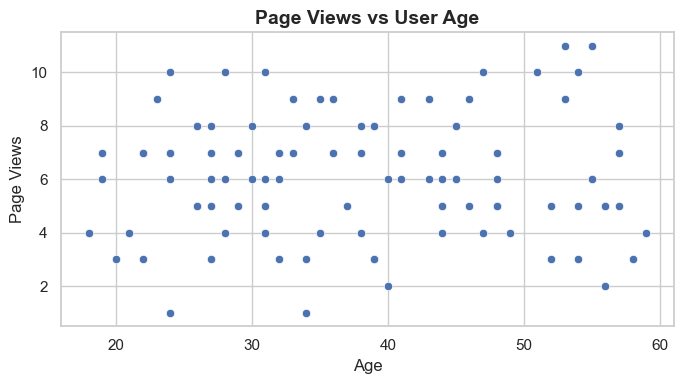

In [9]:
# 📊 Page Views by Age (Scatterplot)

plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x="Age", y="Page Views")

stylize_plot("Page Views vs User Age", "Age", "Page Views")
save_fig("../exports/05_eda/ecommerce_pageviews_vs_age.png")
plt.show()

✅ Plot saved to ../exports/05_eda/ecommerce_correlation_heatmap.png


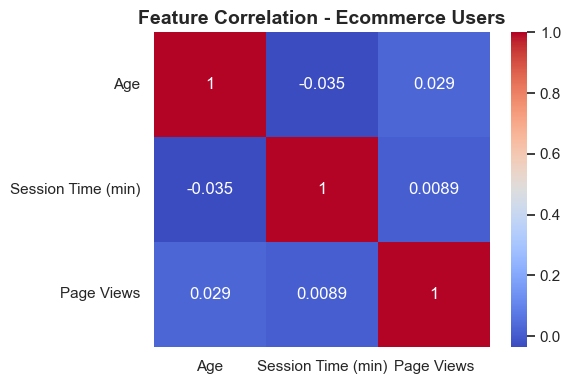

In [10]:
# 📊 Correlation Heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(df[["Age", "Session Time (min)", "Page Views"]].corr(), annot=True, cmap="coolwarm")

stylize_plot("Feature Correlation - Ecommerce Users")
save_fig("../exports/05_eda/ecommerce_correlation_heatmap.png")
plt.show()

In [11]:
# 📊 Binning Users by Age Groups

df["Age Group"] = pd.cut(df["Age"], bins=[15, 25, 35, 45, 60], labels=["15–25", "26–35", "36–45", "46–60"])
df["Age Group"].value_counts()

Age Group
26–35    31
46–60    28
36–45    26
15–25    15
Name: count, dtype: int64

✅ Plot saved to ../exports/05_eda/ecommerce_session_by_age_group.png


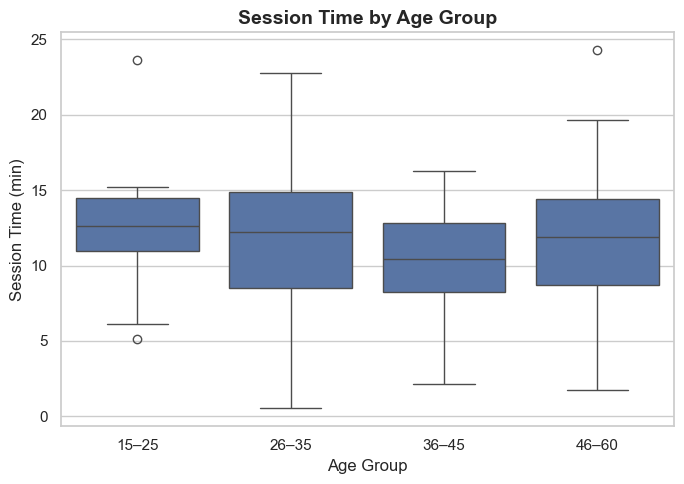

In [12]:
# 📊 Boxplot: Session Time by Age Group

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x="Age Group", y="Session Time (min)")

stylize_plot("Session Time by Age Group", "Age Group", "Session Time (min)")
save_fig("../exports/05_eda/ecommerce_session_by_age_group.png")
plt.show()

# ✅ Summary

In this final notebook, we:

- Explored a real-world-like dataset on user behavior (`ecommerce_data.csv`)
- Visualized missing data, feature distributions, and relationships
- Used KDEs, scatterplots, correlation heatmaps, and boxplots
- Derived actionable insights on how age and session behavior affect engagement
- Continued using reusable functions from `plot_utils.py`
